Import Pandas and pyplot


Exampe 1

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [24]:
df = pd.read_csv('/content/sample_data/nasdaq100.csv',sep=';')
df

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700
5,01.08.23,16800,16400
6,01.07.23,15900,16200
7,01.06.23,15800,15500
8,01.05.23,16150,16100
9,01.04.23,16300,15800


Preprocessing df

In [25]:
df.isnull().sum()

,0
Date,0
Starting (USD),0
Ending (USD),0


In [26]:
df.drop(columns=['Date'], inplace=True)

In [27]:
df

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700
5,16800,16400
6,15900,16200
7,15800,15500
8,16150,16100
9,16300,15800


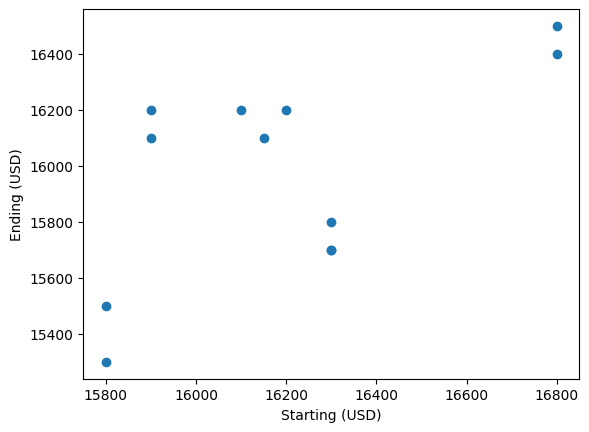

In [30]:
plt.scatter(df['Starting (USD)'] , df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.show()

Independent and Dependent values

In [60]:

x= df.drop('Ending (USD)',axis=1)
y = df[['Ending (USD)']]
print(x)
print(y)

    Starting (USD)
0            16800
1            15900
2            15800
3            16100
4            16300
5            16800
6            15900
7            15800
8            16150
9            16300
10           16200
11           16300
    Ending (USD)
0          16500
1          16100
2          15300
3          16200
4          15700
5          16400
6          16200
7          15500
8          16100
9          15800
10         16200
11         15700


Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [61]:
x.mean()

,0
Starting (USD),16195.833333


In [62]:
y.mean()

,0
Ending (USD),15975.0


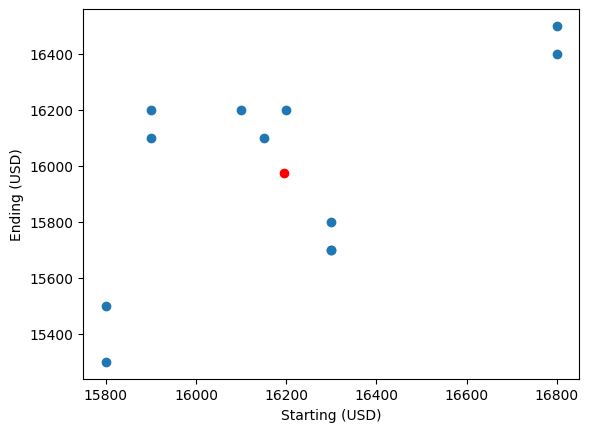

In [63]:
plt.scatter(x.mean(),y.mean(), color = 'red')
plt.scatter(x,y)
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.show()

Train The Model

In [65]:

reg.fit(x, y)


LinearRegression()

In [67]:
#coefficient
m=reg.coef_
print(m)

[[0.65258293]]


In [68]:
#intercept
b=reg.intercept_
print(b)

[5405.87555702]


In [69]:
df['Predicted_y'] = reg.predict(x)
df

,Starting (USD),Ending (USD),Predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389
5,16800,16400,16369.268856
6,15900,16200,15781.944215
7,15800,15500,15716.685922
8,16150,16100,15945.089949
9,16300,15800,16042.977389


Showing All info

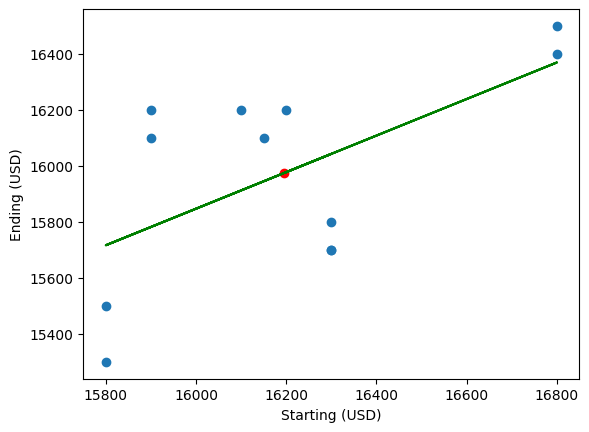

In [72]:
plt.scatter(x,y)
plt.scatter(x.mean(),y.mean(), color = 'red')
plt.plot(x,df['Predicted_y'],color='green')
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.show()

Loss, Cost and Accuracy

In [73]:
reg.score(x,y)


0.3577804940272571

In [76]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
mae=mean_absolute_error(y,df['Predicted_y'])
print(mae)
score=r2_score(y,df['Predicted_y'])
print(score)
mse=mean_squared_error(y,df['Predicted_y'])
print(mse)

260.3840017604666
0.3577804940272571
80411.23397700385


**Linear Regression with another Example**

In [91]:
df2 = pd.read_csv('/content/sample_data/Salary Data.csv')
df2

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.5,48266
7,2.9,56642
8,3.0,60150
9,3.2,54445


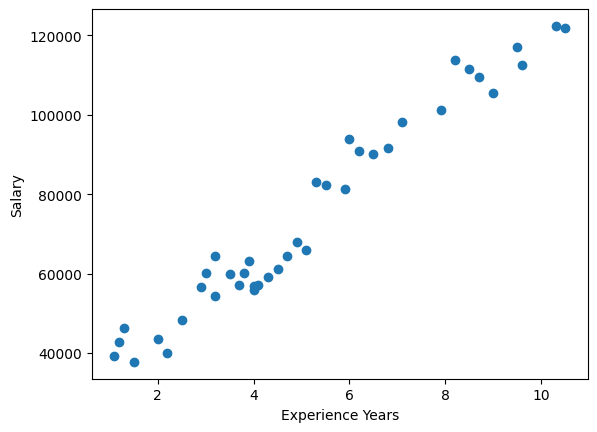

In [92]:
plt.scatter(df2['Experience Years'] , df2['Salary'])
#plt.plot(df['Experience Years'] , df['Salary'])
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.show()

Fit df wiht Linear Regression

In [93]:
reg.fit(df2[['Experience Years']], df2[['Salary']])


LinearRegression()

In [94]:
reg.predict([[10.5]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[125671.34608842]])

In [95]:
df['Predicted_y'] = reg.predict(df2[['Experience Years']])

In [96]:
df

,Experience Years,Salary,Predicted_y
0,1.1,39343,36149.031319
1,1.2,42774,37101.396369
2,1.3,46205,38053.761420
3,1.5,37731,39958.491522
4,2.0,43525,44720.316775
5,2.2,39891,46625.046877
6,2.5,48266,49482.142029
7,2.9,56642,53291.602232
8,3.0,60150,54243.967283
9,3.2,54445,56148.697384


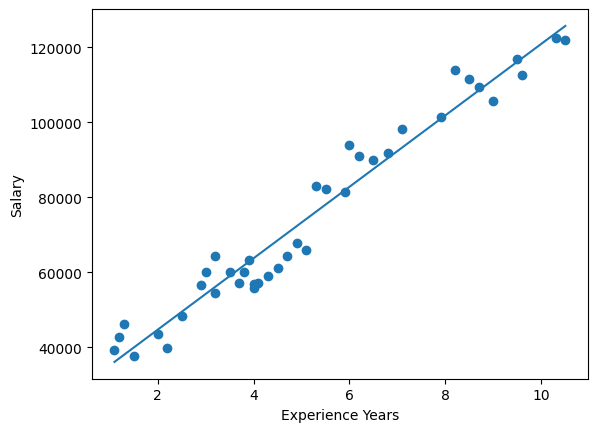

In [97]:
plt.scatter(df2['Experience Years'] , df2['Salary'])
plt.plot(df2['Experience Years'] , df['Predicted_y'])
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.show()